<a href="https://colab.research.google.com/github/kimsuyeon0/studyml/blob/master/hands-on-ml/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 앙상블학습

- 예측기로부터 예측을 수집하면 가장 좋은 모델 하나보다 더 좋은 예측을 할 수 있다. 이 예측기를 앙상블이라 부르기 때문에 앙상블 학습 알고리즘을 앙상블 방법이라고 한다.
- 결정트리의 앙상블이 랜덤포레스트이다.


### 투표기반 분류기
- 직접투표분류기(hard voting)
 - 각 분류기의 예측을 모아 가장 많이 선택된 클래스 예측(다수결 투표)
 - 개별 분류기 중 가장 뛰어난 것보다 정확도가 높은 경우가 많다. 약한 학습기라도 앙상블을 사용하면 강한 학습기가 될 수 있다.
  
- 큰 수의 법칙
 - 분류기가 완벽하고 독립적이고 오차에 상관관계가 없어야 앙상블이 좋은 성능을 발휘함.


In [0]:
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [0]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

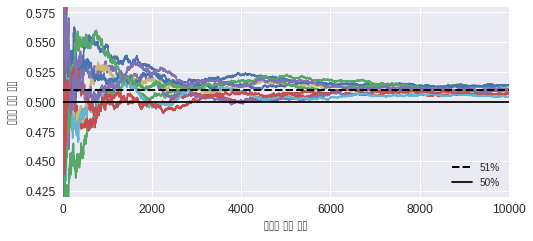

In [39]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("동전을 던진 횟수")
plt.ylabel("앞면이 나온 비율")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
#투표기반분류기훈련코드 moons 데이터셋
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [0]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [43]:
#각 분류기의 테스트셋 정확도 확인
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: Fu

- 투표 기반 분류기가 다른 개별 분류기보다 성능이 더 높다.
모든 분류기가 클래스의 확률을 예측할 수 있다면 예측을 평균내서 확률이 가장 높은 클래스를 예측할 수 있고 이것을 간접투표(soft voting)이라고 한다.
- 확률이 높은 투표에 비중을 더 두기 때문에 직접 투표방식보다 성능이 높다.
- voting="hard"를 voting="soft"로 변경 시 모든 분류기가 클래스의 확률을 추정할 수 있다.
- svc의 경우 기본값에서 클래스 확률을 제공하지 않기 때문에 probability 매개변수를 True로 지정해야한다.

In [44]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...'rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [45]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: Fu

### 배깅, 페이스팅

- 배깅(bootstrap aggregating) : 훈련세트에서 중복을 허용하여 샘플링하는 방식
- 페이스팅(pasting) : 중복을 허용하지 않고 샘플링하는 방식



- 배깅과 페이스팅은 같은 훈련샘플을 여러개의 예측기에 사용할 수 있다. 하지만 배깅만 같은 훈련샘플을 여러번 샘플링 할 수 있다.
- 모든 예측기가 훈련을 마치면 앙상블은 모든 예측기의 예측을 모아서 새로운 샘플에 대한 예측을 만듬. 수집함수는 전형적 분류일떄는 통계적 최빈값이고 회귀에 대해서는 평균을 계산한다.
- 일반적으로 앙상블의 결과는 원본 데이터 셋을 하나의 예측기에 훈련시킬 떄와 비교해서 편향이 비슷하지만 분산이 줄어든다.
- 병렬수행이 가능한 확장성 때문에 배깅과 페이스팅은 유용하다.


In [0]:
#결정트리분류기 500개 앙상블, 중복허용, 무작위 100개 샘플

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500, 
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42) #부트스트랩이 False로 지정되면 페이스팅. n_jobs 는 cpu 코어수 지정 (-1은 가용가능한 모든 코어사용)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [48]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

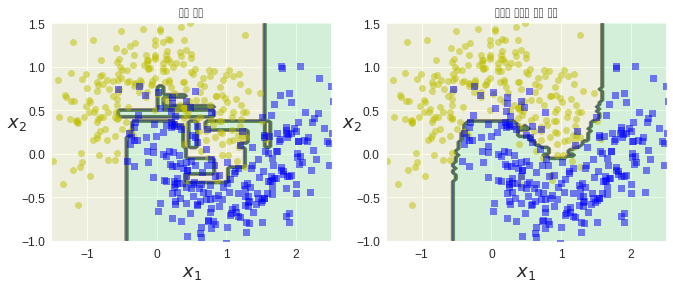

In [50]:
# 단일결정트리의 결정경계/500개 트리를 사용한 배깅앙상블의 결정경계 비교 앙상블이 일반화가 더 잘된다. 비슷한 편향에서 더 작은 분산.(=훈련셋의 오차는 비슷하지만 결정경계가 덜 불규칙함.)
# 부트 스트래핑은 서브셋의 다양성이 증가하므로 배깅이 페이스팅보다 편향이 조금 더 높다. 하지만 상관관계를 줄이는 효과가 있어 분산을 감소시킴. 
# 둘다 평가하는 것이 좋긴함.

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("결정 트리", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("배깅을 사용한 결정 트리", fontsize=14)
plt.show()

### oob(out of bag)평가 

- 배깅의 경우 어떤 샘플은 여러번 샘플링되고 어떤 것은 전혀 선택이 되지 않을 수 있다. 
- 선택되지 않은 훈련샘플의 나머지를 oob샘플이라고 함.
- 훈련되는 동안 전혀 사용되지 않으므로 검증셋이나 교차검증을 사용하지 않고 oob샘플을 사용해서 앙상블을 평가할 수 있다.

In [51]:
# BaggingClassifier oob_score=True 로 지정하면 훈련이 끝난 후 자동으로 oob평가를 수행한다.

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [52]:
# 테스트시 91.2%의 정확도 획득
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [53]:
#결정함수는 oob_decision_function변수에서 확인가능
bag_clf.oob_decision_function_

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

### 랜덤 패치, 랜덤 서브스페이스 

- 배깅클레시파이어는 특성샘플링을 지원함. 매개변수는 max_features, bootstrap_features
- 

- 랜덤 패치 방식 : 훈련 특성과 샘플을 모두 샘플링
- 랜덤 서브스페이스 방식 : 훈련샘플을 모두 사용하고 특성은 샘플링

- 특성 샘플링은 더 다양한 예측기를 만들 수 있고 편향을 늘리고 분산을 낮춘다.

### 랜덤 포레스트
- 배깅을 적용한 결정트리 앙상블
- max_samples 를 훈련세트의 크기로 지정
- 배깅 클레스파이어 대신 결정트리에 최적화된 랜덤포레스트클레시파이어 사용가능함.
- 트리의 노드를 분할 할 때 전체 특성 중 최선의 특성을 찾는 대신 무작위로 선택한 특성 후보중 최적의 특성을 찾는 식으로 무작위성을 주입한다. 이것이 트리를 다양하게 만들고 편향을 손해보는 대신 분산을 낮추므로 전체적으로는 더 좋은 모델이 된다.

In [0]:
# 500개 트리 랜덤포레스트 분류기를 여러 cpu코어에서 훈련

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

#### 엑스트라 트리
- 극단적으로 무작위한 트리의 랜덤 포레스트 앙상블
- 편향이 늘어나고 분산이 낮아짐
- 최적의 임계값을 찾는 시간을 줄이므로 랜덤포레스트보다 엑스트라 트리가 더 빠르다.
- 사이킷런의 "ExtraTreesClassifier" 사용


#### 특성중요도
- 랜덤포레스트는 특성의 상대적 중요도를 측정하기 쉽다.
- 사이킷런은 어떤 특성을 사용한 노드가 평균적으로 불순도를 얼마나 감소시키는지 확인하여 특성의 중요도를 측정.
- 가중치의 평균과 각 노드의 가중치는 연관된 훈련의 샘플 수와 같다.
- 사이킷런에서는 훈련이 끝난 후 특성마다 자동으로 점수를 계산하고 중요도의 전체합이 1이 되도록 결과를 정규화시켜준다.

In [55]:
# 꽃잎의 길이가 가장 중요. 너비그다음. 꽃받침의 길이와 너비는 비교적 덜 중요.

from sklearn.datasets import load_iris
iris=load_iris()
rnd_clf=RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.09661480140056336
sepal width (cm) 0.022743706267821077
petal length (cm) 0.44437393042229467
petal width (cm) 0.4362675619093205


In [56]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

KeyboardInterrupt: ignored

In [57]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

NameError: ignored

In [0]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    plt.axis("off")

In [59]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['중요하지 않음', '매우 중요함'])

plt.show()

NotFittedError: ignored

### 부스팅
- 약한 학습기를 여러개 연결하여 강한 학습기를 만드는 앙상블 방법


#### 아다부스트
- 이전 예측기를 보완하는 새로운 예측기를 만드려면 이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높이는 것이며 새로운 예측기는 학습하기 어려운 샘플에 더 맞추어진다. 이 방법이 아다부스트에서 사용되는 방법이다.
- 첫번째 분류기 훈련 -> 잘못분류된 훈련샘플가중치 높이기 -> 두번째 분류기에서 업데이트된 가중치 사용하여 훈련, 다시 예측 -> 업데이트

In [0]:
# 200개의 얕은 결정트리를 기반으로 하는 아다부스트 분류기. 결정트리의 맥스텝스는 1, 결정노드 1개 리프노드 2개. 

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

#### 그래디언트 부스팅
- 아다부스트처럼 반복마다 샘플의 가중치를 수정하는 것이 아니라 이전 예측기가 만든 잔여 오차에 샐운 예측기를 학습

### 스태킹
- 앙상블에 속한 모든 예측기의 예측을 취합하는 함수대신 취합하는 모델을 훈련시키기 위해 나온 모델